## Nolan Greth

### Objectives: Demonstrate the ability to use pandas, numpy and seaborn
### We will use a well log 

qsiwell2.csv

https://pangea.stanford.edu/researchgroups/srb/resources/books/quantitative-seismic-interpretation

### What are well-logs?

Well-logs are single point measurements of physical properties of the subsurface recorded in a well and vary vertically with depth. The properties are random and aperiodic and depend on factors like mineral composition or lithology, porosity, cementation and compaction, presence of fluids etc., A suite of conventional well-logs recorded from an offshore area is shown. Each log (column) shows how the properties vary with depth. Here, we are looking at sediments that were deposited 5 to 16 million years ago!! 

Typical well log recording:
* DEPTH - depth at which measurements have been made
* VP - compression wave (P-wave) velocity
* VS - shear wave velocity
* RHO_OLD - density
* GR - Gamma ray count
* NPHI - Neutron porosity
* VPVS - Vp/Vs
* IP - P-impedance
* IS - Shear-impedance
* VSH - shale volume
* RHOm - maytrix density
* RHOf - fluid density
* PHI - porosity

Note: Once the log meaurements are made, a geologist would examine the values and come up with his interpretation of lithology/rock types (e.g., brine sand, gas-sand, oil-sand, shale etc) at each depth point.

## The Tasks

* Import well log data
* Examine the columns
* Remove bad values
* add/delete colums
* examine corrleaton between parameters
* create a new lithology curve log;
* plot different logs and the interpreted lithology



Import essential libraries

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import warnings
warnings.filterwarnings('ignore')

### Set the directory path & load the data

In [2]:
os.chdir(r'C:\Users\ngret\Downloads\GEO ML\Lab 2\HW')
logs = pd.read_csv("qsiwell2.csv") #Use the variable logs to load the data (for compatibility with later code)

* What type of logs do we have?
* How many rows and how many columns?

In [3]:
#Show first 5 rows
logs.head()

DEPTH      VP     VS  RHO_OLD       GR    NPHI       RHO   SW  SWX  \
0  2013.2528  2294.7  876.9   1.9972  91.8785  0.4908  2.240104  1.0  1.0   
1  2013.4052  2296.7  943.0   2.0455  86.8004  0.4833  2.240104  1.0  1.0   
2  2013.5576  2290.4  912.5   2.1122  86.0021  0.4474       NaN  1.0  1.0   
3  2013.7100  2277.5  891.6   2.1960  87.3570  0.4140  2.242800  1.0  1.0   
4  2013.8624  2262.0  890.5   2.2020  90.4024  0.4293  2.240064  1.0  1.0   

       VPVS           IP           IS       VSH      RHOm  RHOf       PHI  
0  2.616832  5144.846857  2112.418072  0.493621  2.728979  1.09  0.294312  
1  2.435525  5144.846857  2112.418072  0.436010  2.719762  1.09  0.294312  
2       NaN          NaN          NaN       NaN  2.718313  1.09  0.292342  
3  2.554397  5107.977000  1999.680480  0.442325  2.720772  1.09  0.293096  
4  2.540146  5067.024768  1994.776992  0.476875  2.726300  1.09  0.297156

In [4]:
#print size
print('Rows =', logs.shape[0])
print('Columns=', logs.shape[1])

Rows = 4117
Columns= 16


* Delete the column RHO_OLD
* check to make sure that it has indeed been deleted

In [5]:
#Delete the column RHO_OLD
del logs['RHO_OLD']
#Display first five rows again to show it has indeed been deleted
logs.head()

DEPTH      VP     VS       GR    NPHI       RHO   SW  SWX      VPVS  \
0  2013.2528  2294.7  876.9  91.8785  0.4908  2.240104  1.0  1.0  2.616832   
1  2013.4052  2296.7  943.0  86.8004  0.4833  2.240104  1.0  1.0  2.435525   
2  2013.5576  2290.4  912.5  86.0021  0.4474       NaN  1.0  1.0       NaN   
3  2013.7100  2277.5  891.6  87.3570  0.4140  2.242800  1.0  1.0  2.554397   
4  2013.8624  2262.0  890.5  90.4024  0.4293  2.240064  1.0  1.0  2.540146   

            IP           IS       VSH      RHOm  RHOf       PHI  
0  5144.846857  2112.418072  0.493621  2.728979  1.09  0.294312  
1  5144.846857  2112.418072  0.436010  2.719762  1.09  0.294312  
2          NaN          NaN       NaN  2.718313  1.09  0.292342  
3  5107.977000  1999.680480  0.442325  2.720772  1.09  0.293096  
4  5067.024768  1994.776992  0.476875  2.726300  1.09  0.297156

How can we check if we have really deleted `RHO_OLD`:?

In [283]:
if 'RHO_OLD' in logs:
    print('RHO_OLD has not been deleted')
else:
    print('RHO_OLD has been deleted')

RHO_OLD has been deleted


* Rename RHOf to RHOfluid (Hint, use DataFrame.rename() )


In [284]:
logs.rename(columns={'RHOf': 'RHOfluid'})

DEPTH      VP      VS       GR    NPHI       RHO   SW  SWX  \
0     2013.2528  2294.7   876.9  91.8785  0.4908  2.240104  1.0  1.0   
1     2013.4052  2296.7   943.0  86.8004  0.4833  2.240104  1.0  1.0   
2     2013.5576  2290.4   912.5  86.0021  0.4474       NaN  1.0  1.0   
3     2013.7100  2277.5   891.6  87.3570  0.4140  2.242800  1.0  1.0   
4     2013.8624  2262.0   890.5  90.4024  0.4293  2.240064  1.0  1.0   
5     2014.0148  2263.1   863.1  93.3074  0.4746  2.237408  1.0  1.0   
6     2014.1672  2256.7   817.5  91.9733  0.5010  2.234000  1.0  1.0   
7     2014.3196  2248.9   810.6  88.6270  0.4730  2.233804  1.0  1.0   
8     2014.4720  2239.1   790.2  84.5827  0.4236  2.232280  1.0  1.0   
9     2014.6244  2242.9   725.3  84.5907  0.4114  2.230268  1.0  1.0   
10    2014.7769  2234.6   725.3  84.4878  0.4430  2.228385  1.0  1.0   
11    2014.9292  2195.6   688.8  86.1940  0.5060  2.228416  1.0  1.0   
12    2015.0815  2181.8   762.2  83.5144  0.5320  2.222925  1.0  1.0   
13    2015.2340  2181.4   748.4  85.3374  0.5283  2.215980  1.0  1.0   
14    2015.3864  2200.0   766.7  80.9337  0.5050  2.214000  1.0  1.0   
15    2015.5388  2206.8   787.5  83.6182  0.4759  2.215940  1.0  1.0   
16    2015.6912  2210.4   789.5  84.5900  0.4922  2.219456  1.0  1.0   
17    2015.8436  2261.8   851.5  88.9940  0.4982  2.220436  1.0  1.0   
18    2015.9960  2271.4   860.7  90.1404  0.5066  2.227240  1.0  1.0   
19    2016.1484  2293.2   835.0  89.5602  0.4927  2.234484  1.0  1.0   
20    2016.3008  2351.0   864.3  88.6310  0.4738  2.236048  1.0  1.0   
21    2016.4532  2360.9   865.2  88.7827  0.4508  2.245724  1.0  1.0   
22    2016.6056  2336.2   917.0  89.3878  0.4180  2.256112  1.0  1.0   
23    2016.7581  2346.3   870.8  87.3307  0.4537  2.256257  1.0  1.0   
24    2016.9104  2278.7   859.3  88.0504  0.4665  2.252312  1.0  1.0   
25    2017.0627  2289.1   834.5  87.2316  0.4898  2.249671  1.0  1.0   
26    2017.2152  2294.4   835.4  88.7209  0.4572  2.238456  1.0  1.0   
27    2017.3676  2461.8   892.7  90.2616  0.4460  2.241338  1.0  1.0   
28    2017.5200  2495.4   886.7  91.1066  0.4496  2.250000  1.0  1.0   
29    2017.6724  2518.7   905.4  93.1383  0.4593  2.284896  1.0  1.0   
...         ...     ...     ...      ...     ...       ...  ...  ...   
4087  2636.1116  3949.7  1795.4  59.1847  0.0873       NaN  NaN  NaN   
4088  2636.2639  3974.8  1795.4  59.1847  0.0873       NaN  NaN  NaN   
4089  2636.4165  3974.8  1795.4  59.1847  0.0873       NaN  NaN  NaN   
4090  2636.5688  3974.8  1795.4  59.1847  0.0873       NaN  NaN  NaN   
4091  2636.7212  3974.8  1795.4  59.1847  0.0873       NaN  NaN  NaN   
4092  2636.8735  3974.8  1795.4  59.1847  0.0873       NaN  NaN  NaN   
4093  2637.0259  3974.8  1795.4  59.1847  0.0873       NaN  NaN  NaN   
4094  2637.1785  3974.8  1795.4  59.1847  0.0873       NaN  NaN  NaN   
4095  2637.3308  3974.8  1795.4  59.1847  0.0873       NaN  NaN  NaN   
4096  2637.4832  3974.8  1795.4  59.1847  0.0873       NaN  NaN  NaN   
4097  2637.6355  3974.8  1795.4  59.1847  0.0873       NaN  NaN  NaN   
4098  2637.7881  3974.8  1795.4  59.1847  0.0873       NaN  NaN  NaN   
4099  2637.9404  3974.8  1795.4  59.1847  0.0873       NaN  NaN  NaN   
4100  2638.0928  3974.8  1795.4  59.1847  0.0873       NaN  NaN  NaN   
4101  2638.2451  3974.8  1795.4  59.1847  0.0873       NaN  NaN  NaN   
4102  2638.3977  3786.8  1795.4  59.1847  0.0873       NaN  NaN  NaN   
4103  2638.5500  3786.8  1795.4  59.1847  0.0873       NaN  NaN  NaN   
4104  2638.7024  3786.8  1795.4  59.1847  0.0873       NaN  NaN  NaN   
4105  2638.8547  3786.8  1795.4  59.1847  0.0873       NaN  NaN  NaN   
4106  2639.0071  3786.8  1795.4  59.1847  0.0873       NaN  NaN  NaN   
4107  2639.1597  3786.8  1795.4  59.1847  0.0873       NaN  NaN  NaN   
4108  2639.3120  3786.8  1795.4  59.1847  0.0873       NaN  NaN  NaN   
4109  2639.4644  3786.8  1795.4  59.1847  0.0873       NaN  NaN  NaN   
4110  2639.6167  3786.8  1795.4  59.1847  0.0873  

* How do you check the min, max and mean values of a particular data column?

In [285]:
#Assigning a variable to column VS
test = logs.loc[:,'VS']

#minimum of VS
print('minimum VS =', test.min())

#maximum of VS
print('maximum VS =', test.max())

#mean of VS
print('mean VS =', test.mean())


minimum VS = 688.8
maximum VS = 2427.8
mean VS = 1371.2939519067402


* What are the min, max, std etc values of each column of the data?
* What are the min, max, std values of VP, VS, RHO, PHI?

In [286]:
#Create dataframe for all columns to calculate the the min, max, std values
allcols = np.linspace(0,14,15)
test1 = logs.iloc[:,allcols]

df1 = pd.DataFrame({'min': test1.min(),
                   'max': test1.max(),
                   'standard deviation': test1.std()},
                  index = logs.columns)
print(df1)

               min          max  standard deviation
DEPTH  2013.252800  2640.531200          181.145666
VP     1439.900000  4431.000000          449.355552
VS      688.800000  2427.800000          297.056552
GR       48.368700   136.512800           14.464120
NPHI      0.067800     0.533700            0.090255
RHO       2.036616     2.545268            0.061961
SW        0.192638     1.000000            0.161898
SWX       0.641176     1.000000            0.038373
VPVS      0.801994     3.266269            0.231963
IP     4206.314727  8311.770494          798.193079
IS     1534.932941  4560.425997          589.260460
VSH       0.000000     1.000000            0.164100
RHOm      2.650000     2.810000            0.026255
RHOf      0.839718     1.090000            0.050188
PHI       0.106844     0.376396            0.032191


In [287]:
#Create dataframe for only columns VP, VS, RHO, PHI to calculate the min, max, std values.
test2 = logs.iloc[:,[1,2,5,14]]
                                          
df2 = pd.DataFrame({'min': test2.min(),
                   'max': test2.max(),
                   'standard deviation': test1.std()},
                  index = test2.columns)
print(df2)

             min          max  standard deviation
VP   1439.900000  4431.000000          449.355552
VS    688.800000  2427.800000          297.056552
RHO     2.036616     2.545268            0.061961
PHI     0.106844     0.376396            0.032191


## Check for NaN values in the log
### Restrict your calculation to depth range 0-2400 m then replace the NaN values by the average 

In [288]:
logs = logs.loc[(logs.DEPTH>=0) & (logs.DEPTH<=2400)]

#Replace nans with mean column values wih pandas .fillna()
logs['RHO'] = logs['RHO'].fillna(logs['RHO'].mean)
logs['VPVS'] = logs['VPVS'].fillna(logs['VPVS'].mean)
logs['IP'] = logs['IP'].fillna(logs['IP'].mean)
logs['IS'] = logs['IS'].fillna(logs['IS'].mean)
logs['VSH'] = logs['VSH'].fillna(logs['VSH'].mean)

#Heres how we can find out whether or not we have more Nans in the data
nan_index_new = logs.isna()
print(nan_index_new.sum())

print('All nans replaced!')

DEPTH    0
VP       0
VS       0
GR       0
NPHI     0
RHO      0
SW       0
SWX      0
VPVS     0
IP       0
IS       0
VSH      0
RHOm     0
RHOf     0
PHI      0
dtype: int64
All nans replaced!


# Compute lithofacies logs

### Complete the missing sections of code below
### First, restrict your calculation to depth range 2100-2400 m

* lithofacies will be computed using delimiting values in VSH (shale volume) and SW (water saturation)

1) sand_cutoff = 0.20 \
2) brine_sand = ((logs.VSH <= sand_cutoff) & (logs.SW >= 0.9)) \
3) oil_sand = ((logs.VSH <= sand_cutoff) & (logs.SW < 0.9)) \
4) shale = (logs.VSH > sand_cutoff)

### Use the above delimiting values to create the `LFC` log and store it into the  DataFrame

### Use this numeric scheme to store in the LFC log
* LFC=0: undef
* LFC=1: brine sand
* LFC=2: oil sand
* LFC=3: gas sand
* LFC=4: shale

### Then
* count the samples of each of the facies.
* make histogram plots
* make a 1X4 plot as follows:
** (1,1) Vsh, phi and Sw
** (1,2) Ip
** (1,3) Vp/vs
** (1,4) lithofacies (different colors for different facies)
** Makes sure to put axes labels, captions, legend etc.

#### Include your code here

In [289]:
logs = logs.loc[(logs.DEPTH>=2100) & (logs.DEPTH<=2400)]

sand_cutoff = 0.20
brine_sand = ((logs.VSH <= sand_cutoff) & (logs.SW >= 0.9))

#FILL IN YOUR CODE HERE
oil_sand = ((logs.VSH <= sand_cutoff) & (logs.SW < 0.9))
shale = (logs.VSH > sand_cutoff)


Use the above flag logs to create the `LFC` log and store it into the `logs` DataFrame:
#### Include your code here

In [290]:
temp_lfc = np.zeros(np.shape(logs.VSH))
temp_lfc[brine_sand.values] = 1    # LFC will be 1 when ssb (brine sand flag) is True

#FILL IN YOUR CODE HERE TO INCLUDE OIL SAND AND SHEL IN TEMP_LFC
temp_lfc[oil_sand.values] = 2
temp_lfc[shale.values] = 4


logs['LFC'] = temp_lfc             # Copy the temporary log temp_lfc into the DataFrame with name `LFC`

logs.to_csv('qsiwell2_lfc.csv',index=False) # save the data

Now, let's see if this is all ok; the total number of samples after zooming in the 2100-2400 m depth window is:

In [291]:
np.shape(logs.VSH)

(1968,)

and the following prints out how many samples each facies is made of:

In [292]:
string = "brine sst={0}, oil sst={1}, shale={2}"
data = (np.count_nonzero(brine_sand),
        np.count_nonzero(oil_sand),
        np.count_nonzero(shale))
print(string.format(*data))

brine sst=706, oil sst=134, shale=1128


And a final check to make this newly defined `LFC` log only has values within the range 1 to 4 (there will be no undefined samples in this particular depth interval, i.e. classes with `LFC=0`):

In [293]:
print("LFC min: {0}, LFC max: {1}".format(logs.LFC.min(), logs.LFC.max()))

LFC min: 1.0, LFC max: 4.0


It is very easy to do plots of all types with `pandas`, and to show that here's a one-liner that plots $V_\mathrm{P}$ histograms for each class (remember that at this point we only have classes 1, 2 and 4, i.e. brine sand, oil sand and shales):

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000024B6A8D8240>,
      dtype=object)

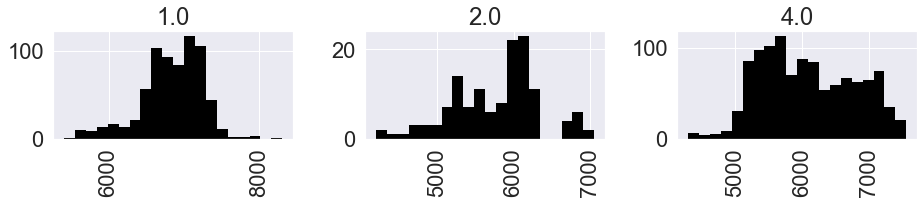

In [294]:
logs.IP.hist(bins=20, color='black', by=logs.LFC, figsize=(15,2), layout=(1,3), lw=0)
#plt.savefig("histograms.png", dpi=250)

## Summary plots

The next few cells visualize the results. No need to do anything until the IP/VPVS crossplot.

First we need a custom colormap for my classes, i.e. a discrete colormap with following classes-colors association:

* LFC=0: undef, GRAY
* LFC=1: brine sand, BLUE
* LFC=2: oil sand, GREEN
* LFC=3: gas sand, RED
* LFC=4: shale, BROWN

This is the way to define this colormap:

In [295]:
import matplotlib.colors as colors
#      0=undef   1=bri  2=oil   3=gas 4=shale
ccc = ['#B3B3B3','blue','green','red','#996633',]
cmap_facies = colors.ListedColormap(ccc[0:len(ccc)], 'indexed')

Let's now display a summary view of all the logs:

[]

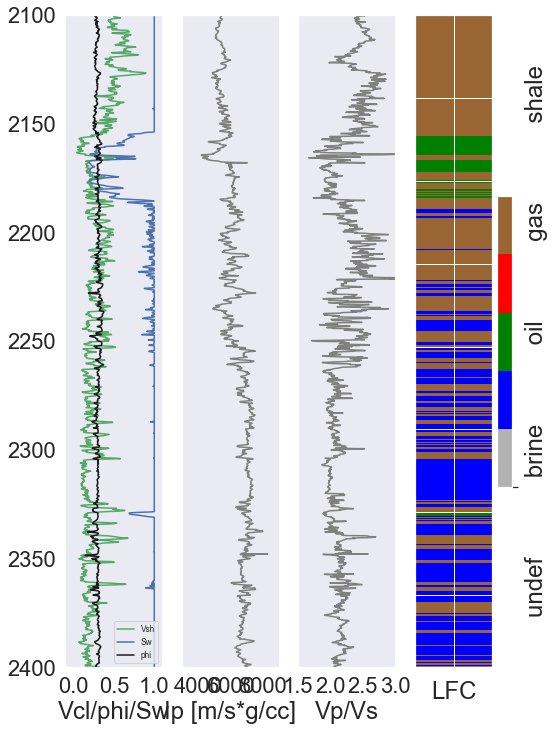

In [296]:
ztop=2100; zbot=2400
ll=logs.loc[(logs.DEPTH>=ztop) & (logs.DEPTH<=zbot)]

cluster=np.repeat(np.expand_dims(ll['LFC'].values,1), 100, 1)

f, ax = plt.subplots(nrows=1, ncols=4, figsize=(8, 12))
ax[0].plot(ll.VSH, ll.DEPTH, '-g', label='Vsh')
ax[0].plot(ll.SW, ll.DEPTH, '-b', label='Sw')
ax[0].plot(ll.PHI, ll.DEPTH, '-k', label='phi')
ax[1].plot(ll.IP, ll.DEPTH, '-', color='0.5')
ax[2].plot(ll.VPVS, ll.DEPTH, '-', color='0.5')
im=ax[3].imshow(cluster, interpolation='none', aspect='auto',cmap=cmap_facies,vmin=0,vmax=4)

cbar=plt.colorbar(im, ax=ax[3])
# cbar.set_label('0=undef,1=brine,2=oil,3=gas,4=shale')
# cbar.set_ticks(range(0,4+1)); cbar.set_ticklabels(range(0,4+1))
cbar.set_label((12*' ').join(['undef', 'brine', 'oil', 'gas', 'shale']))
cbar.set_ticks(range(0,1)); cbar.set_ticklabels('')

for i in range(len(ax)-1):
    ax[i].set_ylim(ztop,zbot)
    ax[i].invert_yaxis()
    ax[i].grid()
    ax[i].locator_params(axis='x', nbins=4)
ax[0].legend(fontsize='small', loc='lower right')
ax[0].set_xlabel("Vcl/phi/Sw"),    ax[0].set_xlim(-.1,1.1)
ax[1].set_xlabel("Ip [m/s*g/cc]"), ax[1].set_xlim(3000,9000)
ax[2].set_xlabel("Vp/Vs"),         ax[2].set_xlim(1.5,3)
ax[3].set_xlabel('LFC')
ax[1].set_yticklabels([]); ax[2].set_yticklabels([]); ax[3].set_yticklabels([]); ax[3].set_xticklabels([])

#plt.savefig("log.png", dpi=250)

### The following code will make a cross-plot of IP vs VPVS and color code using lithofacies. 
### Comment on the results.

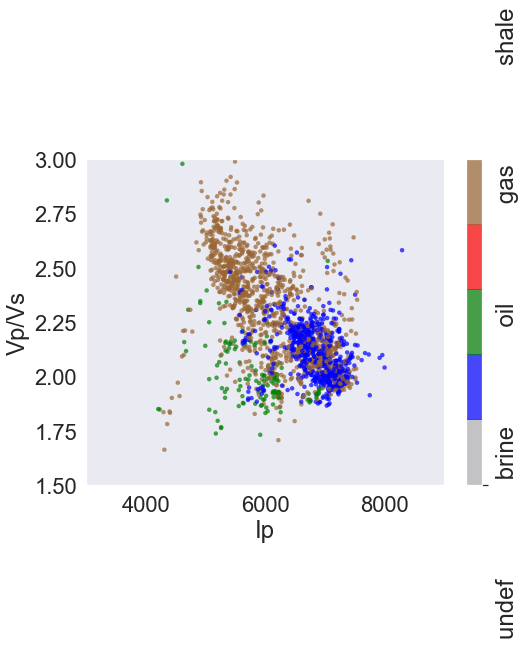

In [297]:
plt.figure(figsize=(8,6))

plt.scatter(logs.IP, logs.VPVS,20, c=logs.LFC,
            marker='o', edgecolors='none',
            alpha=0.7, cmap=cmap_facies,
            vmin=0, vmax=4)
plt.xlim(3000, 9000); plt.ylim(1.5, 3);
plt.xlabel('Ip'); plt.ylabel('Vp/Vs')
plt.grid();

cbar = plt.colorbar()
cbar.set_label((15*' ').join(['undef', 'brine', 'oil', 'gas', 'shale']))
cbar.set_ticks(range(0,1)); cbar.set_ticklabels('')

#plt.savefig("crossplot.png", dpi=250)

### Make crossplots between IP, VPVS, VSH, SW using seaborn

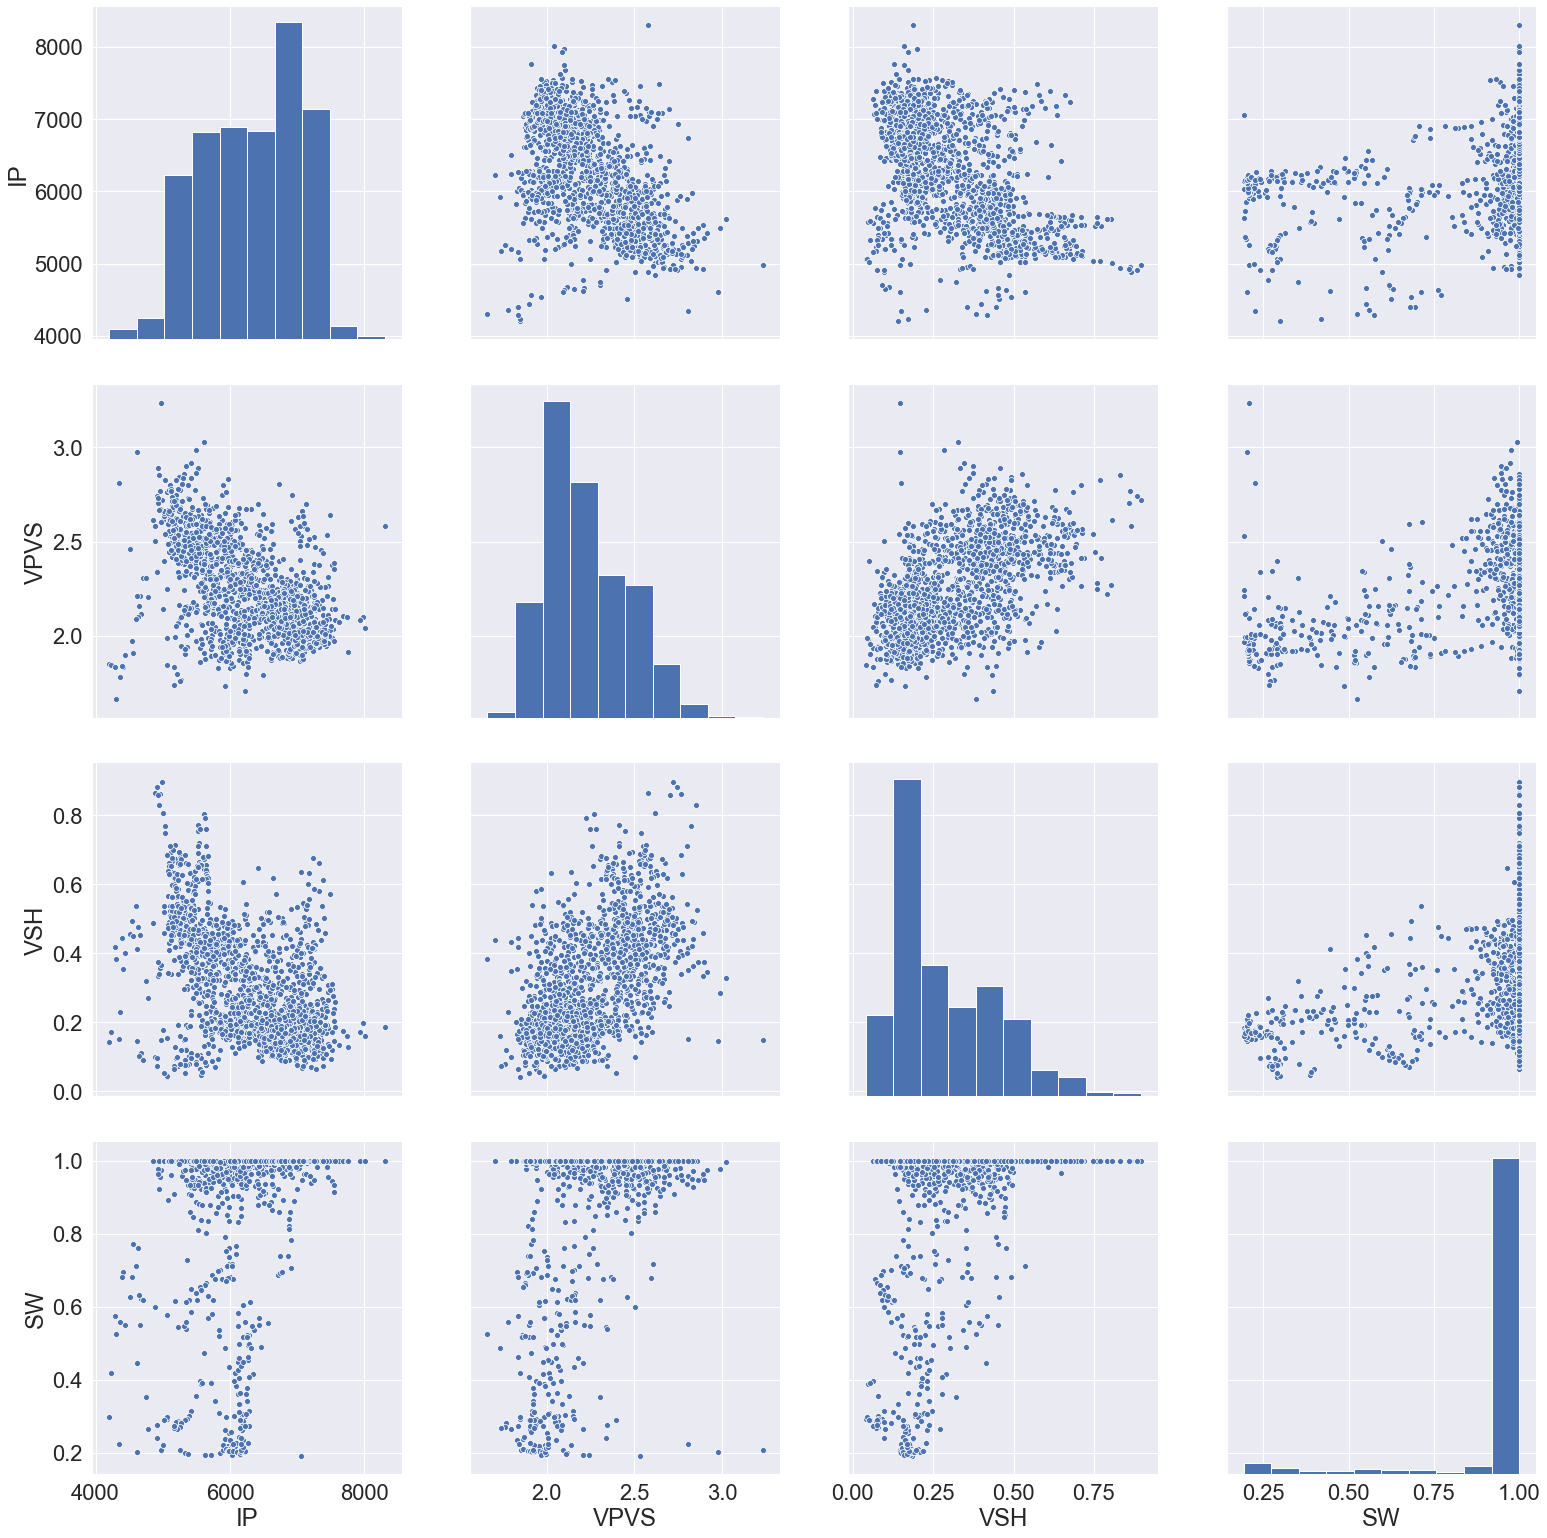

In [298]:
cols = ['IP','VPVS','VSH','SW']
sns.set(font_scale=2)
sns.pairplot(logs[cols], height=5.5)

### Make correlation plots between IP, VPVS, VSH, SW using seaborn heatmap

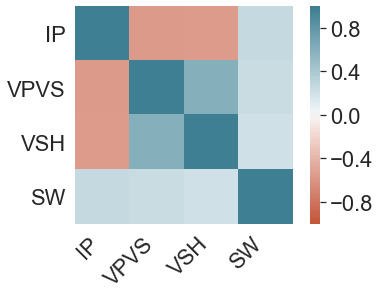

In [299]:
#Convert objects data type to float in order to execute .corr()
logs1 = logs.astype(float)

#Calculate covariance matrix for desired parameters
features1=list(['IP','VPVS','VSH','SW'])
corr = logs1[features1].corr()

#Plot heatmap using seaborn
hm = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
hm.set_xticklabels(
    hm.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
plt.show()

## References

* Avseth, P., Mukerji, T. & Mavko, G. Quantitative Seismic Interpretation. (Cambridge University Press, 2005).


See also the awesome collection of tutorials curated by Matt Hall for [The Leading Edge](http://library.seg.org/journal/leedff) and available here: <https://github.com/seg/tutorials>

<hr />
<p style="color:gray">©2015 Alessandro Amato del Monte, openly licensed under the terms of <a href="https://creativecommons.org/licenses/by-sa/4.0/">CC-BY-SA</a>. This tutorial appeared in SEG Leading Edge in April 2015. </p>